In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('SalaryData_Train(1).csv')
df_test = pd.read_csv('SalaryData_Test(1).csv')

In [3]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


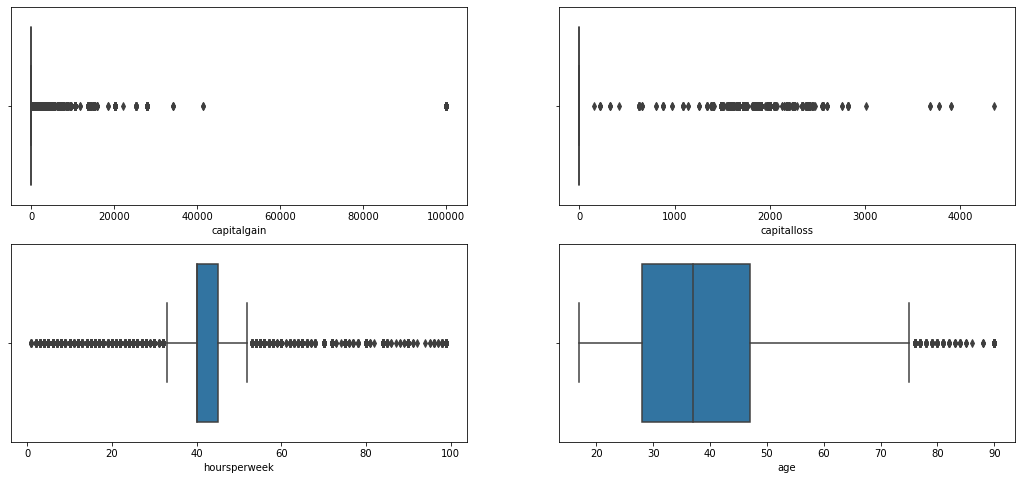

In [5]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(18,8))

sns.boxplot(x=df_train['capitalgain'],orient='h',ax=ax1)
sns.boxplot(x=df_train['capitalloss'],orient='h',ax=ax2)
sns.boxplot(x=df_train['hoursperweek'],orient='h',ax=ax3)
sns.boxplot(x=df_train['age'],orient='h',ax=ax4)

plt.show()

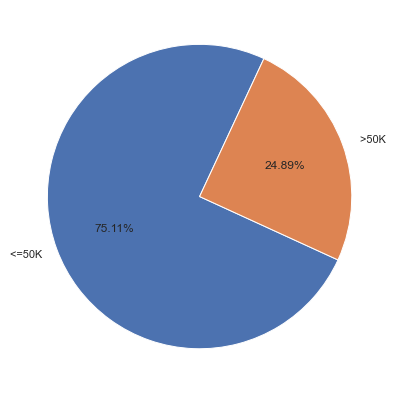

In [6]:
sns.set(rc={'figure.figsize':(10,7)})
labels = list(df_train.Salary.unique())
sizes = list(df_train.Salary.value_counts())

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=65)
plt.show()

In [7]:
df_train['native'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [27]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [9]:
le = LabelEncoder()

In [10]:
columns = list(df_train.columns)

In [11]:
for c in columns:
    df_train[c] = le.fit_transform(df_train[c])
    df_test[c] = le.fit_transform(df_test[c])

In [12]:
df_train.sample(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
14214,29,2,12,13,2,9,0,4,1,0,0,39,37,1
1638,14,2,7,11,4,0,1,4,1,26,0,37,37,0


In [13]:
df_test.sample(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
14722,40,2,11,8,0,0,4,4,0,0,0,39,37,0
13059,8,2,15,9,4,7,1,4,0,62,0,24,37,0


In [17]:
X_train = df_train.drop('Salary',axis=1)
y_train = df_train['Salary']
X_test = df_test.drop('Salary',axis=1)
y_test = df_test['Salary']

#### RBF kernel

In [43]:
svc = SVC()

In [20]:
# Avoiding gridsearch due to limited computational resource.
svc.fit(X_train,y_train)

SVC()

In [21]:
y_pred = svc.predict(X_test)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     11360
           1       0.86      0.28      0.42      3700

    accuracy                           0.81     15060
   macro avg       0.84      0.63      0.65     15060
weighted avg       0.82      0.81      0.77     15060



In [25]:
cm = confusion_matrix(y_test,y_pred)

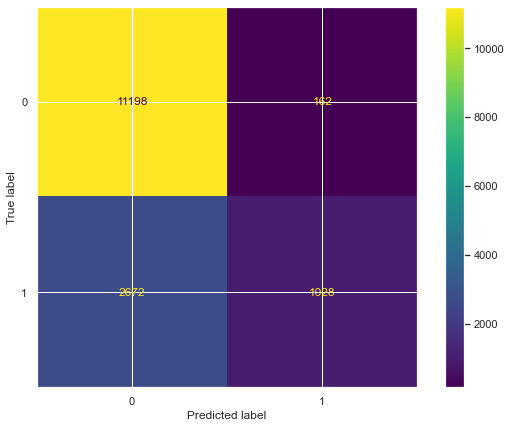

In [29]:
cfx = ConfusionMatrixDisplay(confusion_matrix=cm)
cfx.plot()

#### Linear Kernel

In [32]:
model = SVC(kernel='linear')

In [33]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     11360
           1       0.77      0.29      0.42      3700

    accuracy                           0.80     15060
   macro avg       0.79      0.63      0.65     15060
weighted avg       0.80      0.80      0.77     15060



In [36]:
cm = confusion_matrix(y_test,y_pred)

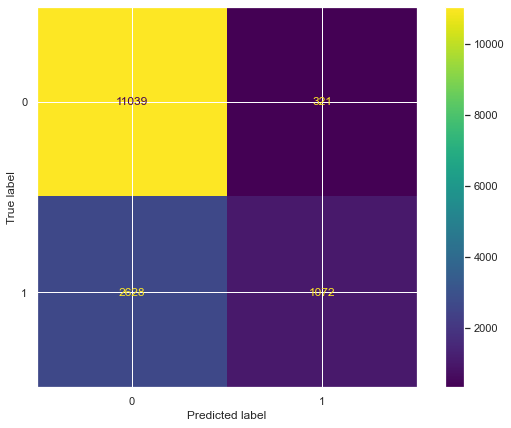

In [37]:
cfx = ConfusionMatrixDisplay(confusion_matrix=cm)
cfx.plot()

#### Polynomial kernel

In [38]:
model = SVC(kernel='poly')

In [39]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     11360
           1       0.84      0.33      0.47      3700

    accuracy                           0.82     15060
   macro avg       0.83      0.65      0.68     15060
weighted avg       0.82      0.82      0.79     15060



In [41]:
cm = confusion_matrix(y_test,y_pred)

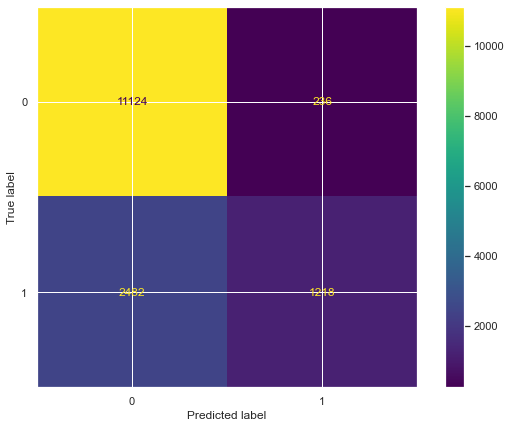

In [42]:
cfx = ConfusionMatrixDisplay(confusion_matrix=cm)
cfx.plot()